Kolonlar:
Index(['Job titiles', 'AI Impact', 'Tasks', 'AI models', 'AI_Workload_Ratio',
       'Domain'],
      dtype='object')

İlk 5 satır:
              Job titiles AI Impact  Tasks  AI models  AI_Workload_Ratio  \
0  Communications Manager       98%    365       2546           0.143362   
1          Data Collector       95%    299       2148           0.139199   
2              Data Entry       95%    325       2278           0.142669   
3              Mail Clerk       95%    193       1366           0.141288   
4      Compliance Officer       92%    194       1369           0.141709   

                      Domain  
0         Communication & PR  
1                  Data & IT  
2  Administrative & Clerical  
3      Leadership & Strategy  
4       Medical & Healthcare  

--- df.info() ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4706 entries, 0 to 4705
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  --

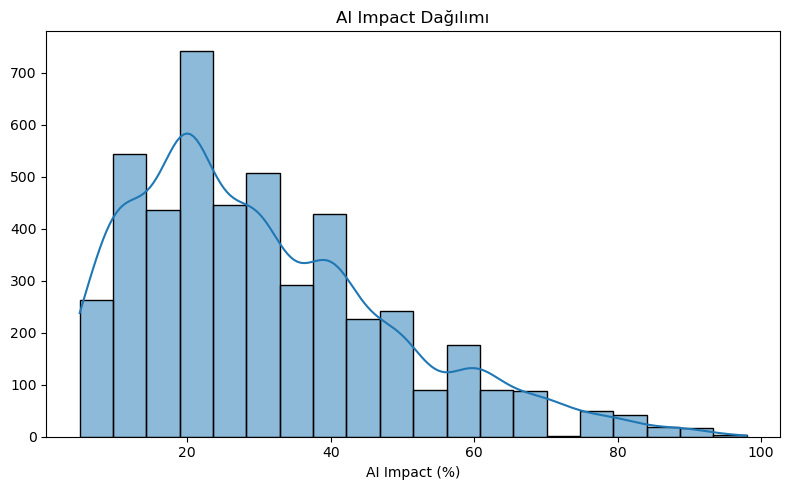

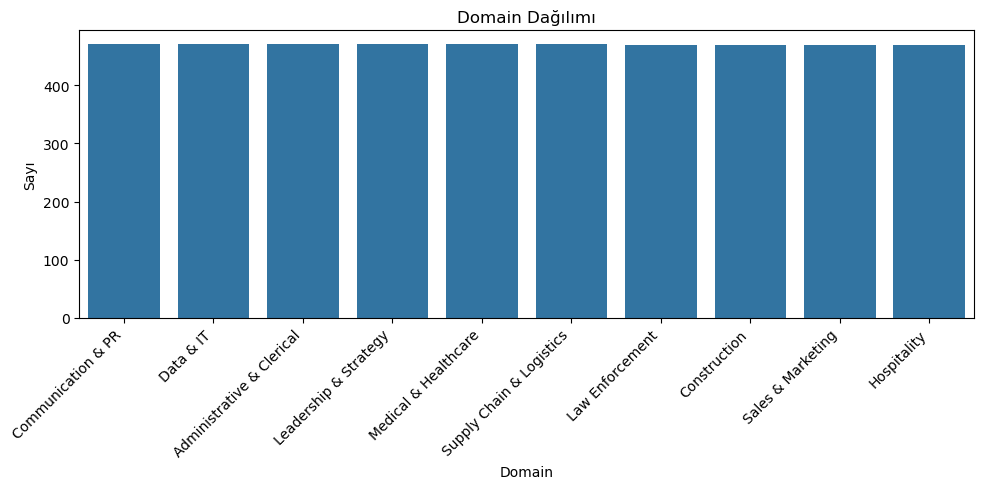


Domain bazlı ortalama AI Impact:
Domain
Communication & PR           30.388535
Data & IT                    30.354565
Administrative & Clerical    30.339703
Leadership & Strategy        30.324841
Law Enforcement              30.308511
Medical & Healthcare         30.295117
Construction                 30.293617
Sales & Marketing            30.280851
Supply Chain & Logistics     30.273885
Hospitality                  30.265957
Name: AI_Impact_num, dtype: float64


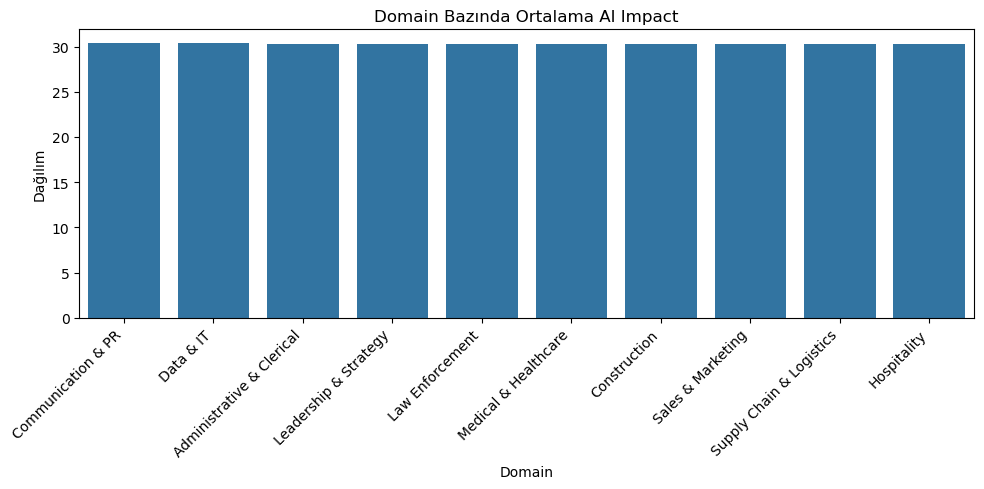

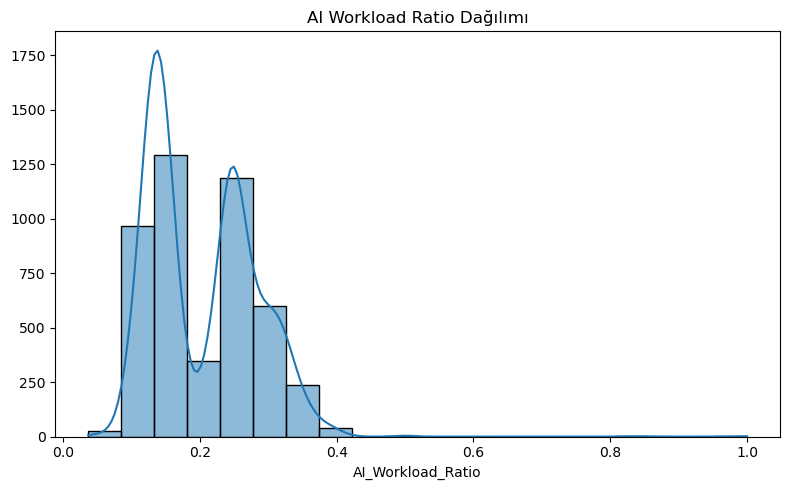


En yüksek riskli ilk 10 meslek:
                  Job titiles AI Impact  AI_Impact_num                    Domain
       Communications Manager       98%           98.0        Communication & PR
               Data Collector       95%           95.0                 Data & IT
                   Data Entry       95%           95.0 Administrative & Clerical
                   Mail Clerk       95%           95.0     Leadership & Strategy
           Compliance Officer       92%           92.0      Medical & Healthcare
Chief Executive Officer (CEO)       91%           91.0  Supply Chain & Logistics
                    Therapist       90%           90.0           Law Enforcement
       Chief Strategy Officer       90%           90.0              Construction
                        Admin       90%           90.0         Sales & Marketing
                General Clerk       90%           90.0               Hospitality

Korelasyon Matrisi:
                   AI_Impact_num     Tasks  AI models  

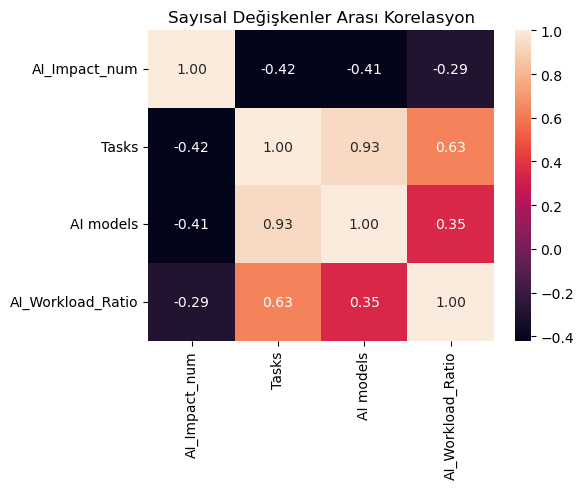


EDA analizi tamamlandı.


In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("My_Data.csv")

print("Kolonlar:")
print(df.columns)
print("\nİlk 5 satır:")
print(df.head())


print("\n--- df.info() ---")
print(df.info())

print("\n--- Eksik Değerler ---")
print(df.isnull().sum())

print("\n--- Sayısal Kolonların İstatistikleri ---")
print(df.describe())



df["AI_Impact_num"] = (
    df["AI Impact"]
    .astype(str)
    .str.replace("%", "", regex=False)
    .astype(float)
)

print("\nAI_Impact_num kolonundan örnek:")
print(df[["AI Impact", "AI_Impact_num"]].head())


bins = [0, 50, 70, 90, 100]
labels = ["Low", "Medium", "High", "Very High"]

df["Risk_Category"] = pd.cut(df["AI_Impact_num"], bins=bins, labels=labels, include_lowest=True)

print("\nRisk_Category dağılımı:")
print(df["Risk_Category"].value_counts())


plt.figure(figsize=(8, 5))
sns.histplot(df["AI_Impact_num"], bins=20, kde=True)
plt.title("AI Impact Dağılımı")
plt.xlabel("AI Impact (%)")
plt.ylabel("")
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 5))
domain_counts = df["Domain"].value_counts()
sns.barplot(x=domain_counts.index, y=domain_counts.values)
plt.title("Domain Dağılımı")
plt.xlabel("Domain")
plt.ylabel("Sayı")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


domain_impact = df.groupby("Domain")["AI_Impact_num"].mean().sort_values(ascending=False)
print("\nDomain bazlı ortalama AI Impact:")
print(domain_impact)

plt.figure(figsize=(10, 5))
sns.barplot(x=domain_impact.index, y=domain_impact.values)
plt.title("Domain Bazında Ortalama AI Impact")
plt.xlabel("Domain")
plt.ylabel("Dağılım")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 5))
sns.histplot(df["AI_Workload_Ratio"], bins=20, kde=True)
plt.title("AI Workload Ratio Dağılımı")
plt.xlabel("AI_Workload_Ratio")
plt.ylabel("")
plt.tight_layout()
plt.show()


job_col = "Job titiles"  

top_10 = df.sort_values("AI_Impact_num", ascending=False)[[job_col, "AI Impact", "AI_Impact_num", "Domain"]].head(10)
print("\nEn yüksek riskli ilk 10 meslek:")
print(top_10.to_string(index=False))


corr_cols = ["AI_Impact_num", "Tasks", "AI models", "AI_Workload_Ratio"]
corr = df[corr_cols].corr()

print("\nKorelasyon Matrisi:")
print(corr)

plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Sayısal Değişkenler Arası Korelasyon")
plt.tight_layout()
plt.show()



